In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
def natural_cubic_spline(x, y):
    """
    Fungsi untuk menghitung koefisien Natural Cubic Spline.
    
    Parameter:
    - x: array dari titik-titik x
    - y: array dari nilai-nilai y
    
    Return:
    - koefisien spline dalam bentuk array (a, b, c, d)
    """
    n = len(x)
    
    # Langkah 1: Inisialisasi
    a = np.array(y)
    delta = np.diff(x)  # delta_i = x_{i+1} - x_i
    delta_y = np.diff(y)  # Delta_i = y_{i+1} - y_i
    
    # Langkah 2: Bangun sistem tridiagonal
    A = np.zeros((n, n))
    b = np.zeros(n)
    
    A[0, 0] = 1  # Kondisi natural spline
    A[-1, -1] = 1  # Kondisi natural spline
    
    for i in range(1, n-1):
        A[i, i-1] = delta[i-1]
        A[i, i] = 2 * (delta[i-1] + delta[i])
        A[i, i+1] = delta[i]
        b[i] = 3 * (delta_y[i] / delta[i] - delta_y[i-1] / delta[i-1])
    
    # Langkah 3: Selesaikan sistem linear
    c = np.linalg.solve(A, b)
    
    # Langkah 4: Hitung koefisien lainnya
    b = np.zeros(n-1)
    d = np.zeros(n-1)
    for i in range(n-1):
        d[i] = (c[i+1] - c[i]) / (3 * delta[i])
        b[i] = (delta_y[i] / delta[i]) - (delta[i] / 3) * (2 * c[i] + c[i+1])
    
    # Return koefisien a, b, c, d
    return a[:-1], b, c[:-1], d

In [41]:
def evaluate_spline(x, coeffs, eval_points):
    """
    Evaluasi spline pada titik-titik tertentu.
    
    Parameter:
    - x: array dari titik-titik x
    - coeffs: tuple (a, b, c, d) hasil dari fungsi natural_cubic_spline
    - eval_points: array dari titik-titik x untuk evaluasi
    
    Return:
    - Nilai spline pada eval_points
    """
    a, b, c, d = coeffs
    n = len(a)
    results = []
    
    for xp in eval_points:
        # Temukan interval [x_i, x_{i+1}] untuk xp
        for i in range(n):
            if x[i] <= xp <= x[i+1]:
                dx = xp - x[i]
                results.append(a[i] + b[i] * dx + c[i] * dx**2 + d[i] * dx**3)
                break
    
    return np.array(results)

In [42]:
# Data x, y, dan t yang digunakan sebelumnya
t = np.array([0, 60, 120, 180, 240, 300, 360, 420, 480, 540])
x = np.array([0, 2.73, 2.70, 2.62, 2.68, 2.68, 2.64, 2.72, 2.69, 2.55])
y = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45])

# Hitung koefisien spline
coeffs_x = natural_cubic_spline(t, x)
coeffs_y = natural_cubic_spline(t, y)

# Evaluasi spline pada interval [0, 540] dengan 1 frame interval
eval_points = np.linspace(0, 540, 541)
spline_values_x = evaluate_spline(t, coeffs_x, eval_points)
spline_values_y = evaluate_spline(t, coeffs_y, eval_points)

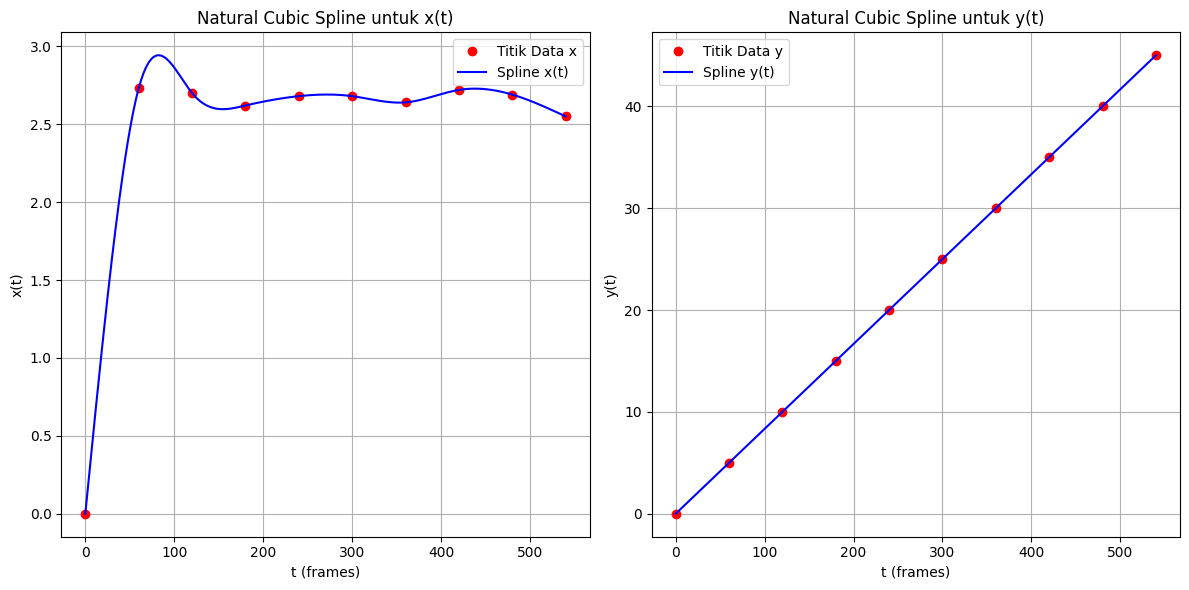

In [43]:
# Plot hasil
plt.figure(figsize=(12, 6))

# Plot untuk x(t)
plt.subplot(1, 2, 1)
plt.plot(t, x, 'ro', label="Titik Data x")
plt.plot(eval_points, spline_values_x, 'b-', label="Spline x(t)")
plt.xlabel("t (frames)")
plt.ylabel("x(t)")
plt.title("Natural Cubic Spline untuk x(t)")
plt.legend()
plt.grid(True)

# Plot untuk y(t)
plt.subplot(1, 2, 2)
plt.plot(t, y, 'ro', label="Titik Data y")
plt.plot(eval_points, spline_values_y, 'b-', label="Spline y(t)")
plt.xlabel("t (frames)")
plt.ylabel("y(t)")
plt.title("Natural Cubic Spline untuk y(t)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()